# DNA classification using ML


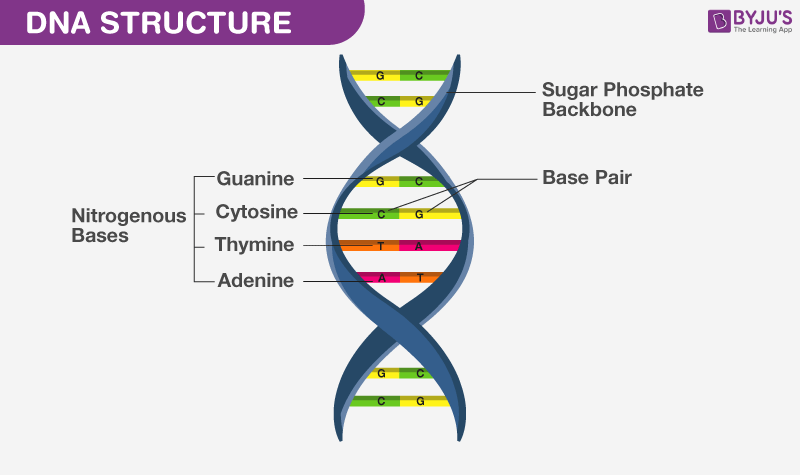

In [37]:
# data source :https://www.kaggleusercontent.com/kf/91641778/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..BNaF343SckVZDvTqoTy9Tg.joQ-8zHs2U_bP4MfEvH1oSbtcS-529a2o_0TN0LdeHOh6Yz4V7rywFxLYf0zCveMivV3TMKZBsEFYylZDb-7eoFNWlnzTMVsqA5IRulOUrRXjpj_2FDPOYZrCNUkW8hRBUSnXI8A4WzarIixLp8wOedKo6SY13rX6sChO1dcERfGGfZuvVdQPfXFPoqZyEx9nLBiQ_URha9EqoLE3-jC1eiDgu5yw04ckKDPaNbnnhd1KKr37vPhKeFl4Lm3BuFIKnGKOQIAmX0Nb0oebY9vhOa9NEv63Vddk4-C6QiJFiQfMIJUPffBzNb6s4N5I9tBuvASyvDwso8i6qUJqRPmLLd_fTb3WTX9nwrAxzfNBZShoJxcYy0yjrxsbdnLVLo0cfKq1wLIwYTolvtynaGEsGDBiHPzOs1-SqoAm_L0ocn2uYacBuga6OhSrsXyXXM4WEZeue62ISTAyukJ_5HbvW1lwGAGIQqPRdfI-1qiIk0KsG5OaGWC-Z2a_lK1Lh77UizOkIbqzklYhbx-ZEfHyfXFNfgmKvheeVkZq0XCiFGewF_uZJ2upS--ZDeMKkaqrtwFSKd8GVb2tL9I33FWZ8EnG2HprgGZ8QNJGqYwNXBk_lBr6S9loCwBsWrh-f5d2GFx8IQmISasy-rdUapvye86-9e-_PpHrU4aJGk198w.5btYhEoDDurWCW7_UOV3vQ/promoters.csv

In [2]:
import sys
import numpy as np
import sklearn
import pandas as pd

In [12]:
#import data
a=pd.read_csv('promoters.csv')
a

,Unnamed: 0,Class,id,Sequence
0,0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...,...
101,101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [11]:
classes = a.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [16]:
#splitting sequence into single nucleotides
sequences = list(a.loc[:, 'Sequence'])
dataset = {}

In [19]:
sequences = list(a.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    #  remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])


['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [20]:
dframe = pd.DataFrame(dataset)
dframe.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [21]:
df = dframe.transpose()
df.iloc[:5]


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [22]:
#name the last column as class
df.rename(columns = {57: 'Class'}, inplace = True) 

In [23]:
#describe our data
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [24]:
#apply dummies to convert text 
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [26]:
#remove class_-
df = numerical_df.drop(columns=['Class_-'])


In [28]:
#splitting data to train &test
from sklearn import model_selection

X = np.array(df.drop(['Class_+'], 1))
y = np.array(df['Class_+'])
seed = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)


/var/folders/tt/k5j8xm3j2fs_p_rnb3whsts00000gn/T/ipykernel_6599/195443520.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Class_+'], 1))


In [30]:
#import libraries for building ML algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings as w
w.filterwarnings('ignore')

In [31]:

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'), 
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')
]

models = zip(names, classifiers)
m = models
# evaluate each model in turn
results = []
names = []

In [32]:
#models evaluation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.810714 (0.099808)
Gaussian Process: 0.855357 (0.160605)
Decision Tree: 0.632143 (0.119576)
Random Forest: 0.658929 (0.166646)
Neural Net: 0.900000 (0.093541)
AdaBoost: 0.875000 (0.147902)
Naive Bayes: 0.837500 (0.112500)
SVM Linear: 0.912500 (0.097628)
SVM RBF: 0.875000 (0.111803)
SVM Sigmoid: 0.925000 (0.100000)


In [35]:
#calculate accuracies
models = zip(names,classifiers)
for name , model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name) 
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

Nearest Neighbors
0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process
0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree
0.7407407407407407
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.60      0.90      0.72        10

    accuracy                           0.74        27
   macro avg       0.7

In [ ]:
#as we see SVM is the best model with highest accuracy 